In [18]:

# TUGAS
# 1) mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)
# 1a) plot grafik-grafik secara berdampingan untuk membandingkan skalanya
# 2) tambahkan faktor-faktor ke objective function (jika perlu)
# 3) temukan titik optimum sesuai diri masing-masing, 
#    temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax
# 4) buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat
#    poin 4 paling penting

# global optimum,
# idx = np.unravel_index(np.argmax(Z_clip), Z_clip.shape)
# opt_x, opt_y, opt_z = X[idx], Y[idx], Z_clip[idx]

NINO AHMADIY

24083010049

ANALISIS NUMERIK

Optimum (analisis numerik, gradient ascent):
Kuliah = 8.44 jam
Main   = 3.06 jam
Quality = 7.63


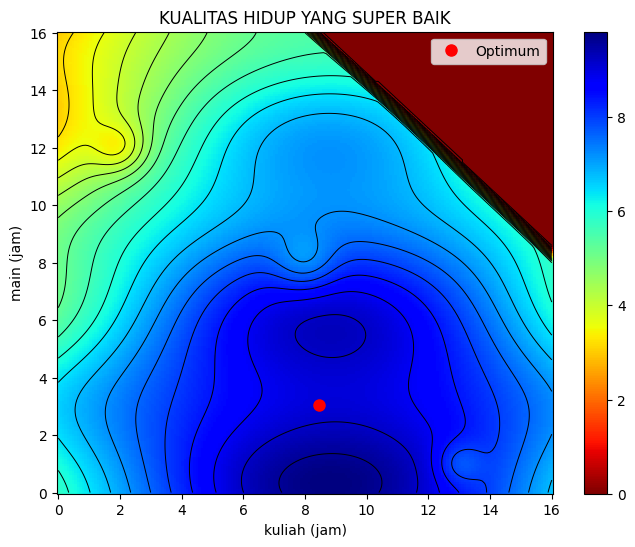

In [21]:
import numpy as np
import matplotlib.pyplot as plt


def objective(x, y):
    kuliah_pref = np.exp(-((x -(9.0))**2) / (10**2))
    main_pref   = np.exp(-((y - 2.0)**2) / (10**2))

    kebanyakan_main    = 1 * np.exp(-((x - 2.0)**2 + (y - 12.0)**2) / 0.8)
    kebanyakan_belajar = 0.8 * np.exp(-((x - 13.0)**2 + (y - 1.0)**2) / 0.6)
    powernap           = 0.9 * np.exp(-((x - 8.0)**2 + (y - 8.0)**2) / 1.0)
    total_penalty      = 0.2 * np.exp((x + y) / 24.0)

    ripple = 0.4 * np.sin((0.3 * x)-1) * np.cos(1.0 * y) -0.2
    
    Z_val = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)
    Z_val = Z_val - kebanyakan_main - kebanyakan_belajar - total_penalty - powernap + ripple

    # penalti total jam > 24
    total_waktu = x + y
    Z_val -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)
    return Z_val

def objective(x, y):
    kuliah_pref = np.exp(-((x -(9.0))**2) / (10**2))
    main_pref   = np.exp(-((y - 2.0)**2) / (10**2))

    kebanyakan_main    = 1 * np.exp(-((x - 2.0)**2 + (y - 12.0)**2) / 0.8)
    kebanyakan_belajar = 0.8 * np.exp(-((x - 13.0)**2 + (y - 1.0)**2) / 0.6)
    powernap           = 0.9 * np.exp(-((x - 8.0)**2 + (y - 8.0)**2) / 1.0)
    total_penalty      = 0.2 * np.exp((x + y) / 24.0)

    # ripple + noise HARUS sama seed supaya konsisten
    NPM = 10049
    rng = np.random.default_rng(NPM)
    noise = rng.normal(loc=0.0, scale=0.1)   # satu sample noise
    ripple = 0.4 * np.sin((0.3 * x)-1) * np.cos(1.0 * y) - 0.2 + noise

    Z_val = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)
    Z_val = Z_val - kebanyakan_main - kebanyakan_belajar - total_penalty - powernap + ripple

    # penalti total jam > 24
    total_waktu = x + y
    Z_val -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)
    return Z_val


print("Optimum (analisis numerik, gradient ascent):")
print("Kuliah =", round(opt_x,2), "jam")
print("Main   =", round(opt_y,2), "jam")
print("Quality =", round(opt_z,2))

#heeatmap 
xmin, xmax, ymin, ymax = 0, 16, 0, 16
res = 200
X = np.linspace(xmin, xmax, res)
Y = np.linspace(ymin, ymax, res)
XX, YY = np.meshgrid(X, Y)

Z = objective(XX, YY)
Z_clip = np.clip(Z, 0, 10)

plt.figure(figsize=(8, 6))
c = plt.pcolormesh(XX, YY, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(XX, YY, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("KUALITAS HIDUP YANG SUPER BAIK")

# titik optimum
plt.plot(opt_x, opt_y, 'ro', markersize=8, label="Optimum")
plt.legend()
plt.show()


sudah terlihat di heatmap yang ada, jika berkuliah selama kurang lebih 8 sampai 9 jam dan bermain sekitar 3 jam an, akan mencapai titik optimal dalam memiliki kualitas hidup yang super baik.

CERITA AKTIVITAS SAYA SEHARI HARI


Pagi (07.00 – 08.00)
Olahraga pagi dengan minum kopi terlebih dahulu dan stretching (semoga bisa membeli fixie secepatnya)

08.00 – 12.00
Kuliah / belajar efektif. Masuk ke puncak produktivitas (sekitar 4 jam).

12.00 – 13.00
Makan siang + istirahat sebentar, biar energi pulih.

13.00 – 15.00
Lanjut kuliah / nugas. Tambahan 2 jam supaya total kuliah sudah 6 jam.

15.00 – 16.00
Powernap ±20 menit. Sisanya santai, ngobrol atau jalan sebentar. Ini menjaga ritme tanpa ganggu tidur malam.

16.00 – 18.00
Waktu main (game, sosmed, nongkrong) sekitar 2 jam. Ini bagian main_pref.

18.00 – 19.00
Makan malam + ibadah. Transisi dari aktivitas santai ke belajar lagi.

19.00 – 21.00
Nugas ringan atau belajar tambahan. Tambah 2 jam, sehingga total kuliah/nugas jadi 8 jam.

21.00 – 22.00
Hiburan ringan (scroll sosmed, nonton netflix bentar) ±1 jam. (melengkapi waktu main yang sampai 4 jam)

22.00 – 07.00
Tidur malam 8-9 jam yang berarti work life balance sekali (tp mungkin agak sulit)

Maka, dengan pola seperti ini, sesuai dengan titik optimum model, seimbang antara produktivitas, hiburan, dan istirahat

Kuliah = ±8 jam (efektif)
Main = ±4 jam
Olahraga = 1 jam pagi
Powernap = 20 menit siang
Tidur malam = 8–9 jam